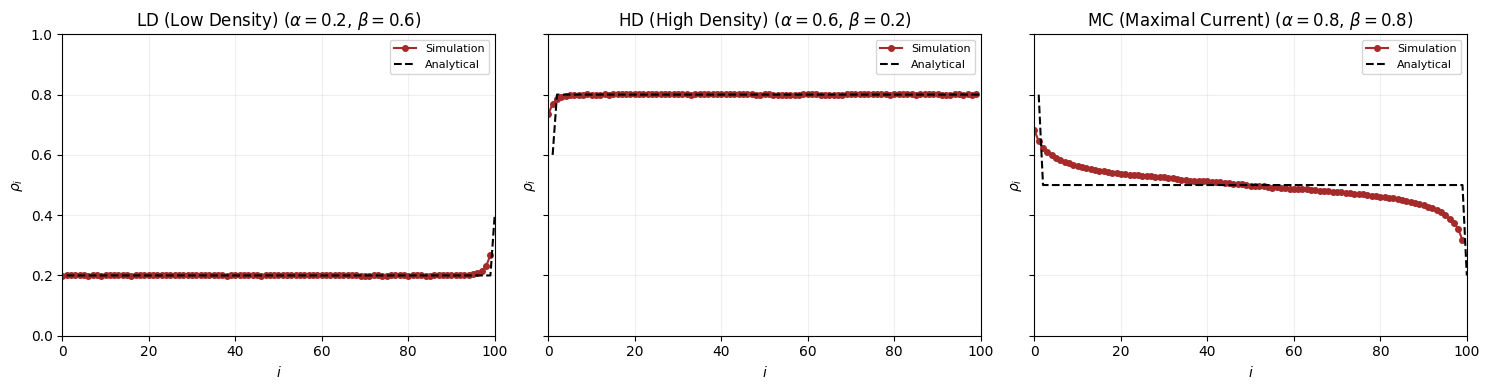

In [ ]:
## TASEP Density Profile: Simulation vs Analytical Results

import matplotlib.pyplot as plt
import numpy as np

def step(site, alpha, beta):
    """
    Perform one step of the TASEP simulation.

    Args:
        site (np.array): Current state of the lattice.
        alpha (float): Entry rate at the left boundary.
        beta (float): Exit rate at the right boundary.

    Returns:
        np.array: Updated state of the lattice.
    """
    L = len(site)
    i = np.random.choice(L)  # Randomly select a site

    if i == 0:  # Left boundary
        if site[i] == 0 and np.random.random() <= alpha:
            site[i] = 1  # Particle enters
        elif site[i] == 1 and site[i + 1] == 0:
            site[i] = 0  # Particle moves right
            site[i + 1] = 1
    elif i == L - 1:  # Right boundary
        if np.random.random() <= beta:
            site[L - 1] = 0  # Particle exits
    else:  # Bulk
        if site[i] == 1 and site[i + 1] == 0:
            site[i] = 0  # Particle moves right
            site[i + 1] = 1
    return site

def run_mc(L, alpha, beta, Nmax, Ninit):
    """
    Run the Monte Carlo simulation for TASEP.

    Args:
        L (int): Length of the lattice.
        alpha (float): Entry rate at the left boundary.
        beta (float): Exit rate at the right boundary.
        Nmax (int): Total number of steps.
        Ninit (int): Number of steps to skip before measuring.

    Returns:
        np.array: Average density profile.
    """
    site = np.zeros(L, dtype=int)  # Initialize lattice
    rho = np.zeros(L)  # Density profile
    rhocnt = 0  # Counter for averaging

    for n in range(Nmax):
        site = step(site, alpha, beta)
        if n > Ninit:  # Start measuring after Ninit steps
            rho += site
            rhocnt += 1
    return rho / rhocnt  # Return average density

def calculate_density_profile(L, alpha, beta):
    """
    Calculate the analytical density profile using mean-field approximation.

    Args:
        L (int): Length of the lattice.
        alpha (float): Entry rate at the left boundary.
        beta (float): Exit rate at the right boundary.

    Returns:
        list: Sites (x-coordinates).
        list: Density profile.
    """
    sites = list(range(1, L + 1))
    density_profile = []

    for x in sites:
        # Calculate bulk density based on phase
        if alpha < min(beta, 0.5):
            bulk_density = alpha  # Low-density phase
        elif beta < min(alpha, 0.5):
            bulk_density = 1 - beta  # High-density phase
        else:
            bulk_density = 0.5  # Maximal current phase

        # Calculate density profile
        if x == 1:
            density_profile.append(alpha)  # Left boundary
        elif x == L:
            density_profile.append(1 - beta)  # Right boundary
        else:
            density_profile.append(bulk_density)  # Bulk density

    return sites, density_profile

# Set common parameters
L = 100  # Lattice size
Nmax = 1000000 * L  # Total steps
Ninit = 50000 * L  # Initial steps to skip

# Define parameters for different phases: (alpha, beta, label)
parameters = [
    (0.2, 0.6, 'LD (Low Density)'),
    (0.6, 0.2, 'HD (High Density)'),
    (0.8, 0.8, 'MC (Maximal Current)')
]

# Create subplots for the three density profiles
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for ax, (alpha, beta, label) in zip(axes, parameters):
    # Monte Carlo simulation
    rho_mc = run_mc(L, alpha, beta, Nmax, Ninit)
    ax.plot(range(L), rho_mc, label='Simulation', color='brown', marker='o', markersize=4)

    # Analytical (mean-field) result
    sites, density_profile = calculate_density_profile(L, alpha, beta)
    ax.plot(sites, density_profile, linestyle='--', linewidth=1.5, color='black', label='Analytical')

    # Plot settings
    ax.set_title(f'{label} ($\\alpha={alpha}$, $\\beta={beta}$)')
    ax.set_xlabel(r'$i$')
    ax.set_ylabel(r'$\rho_i$')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, L)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.2)

plt.tight_layout()
plt.show()